UPDATED: 22/10/2024

P.D. NO VER ESTE, ES + SENCILLO EL ARCHIVO: mpl008_Ex005-6_insurance_sol

E005. Para los datos de insurance.csv, crea un gráfico de tarta con el número de hijos de los asegurados. Las categorías serán: 0, 1, 2, 3 y 4 o más. (ChatGPTeando)



In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# %matplotlib qt
%matplotlib inline

In [7]:
# para google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# path= "../datos/"
path = "/content/drive/My Drive/Clara del Rey/BIG DATA/Programacion/FTP/000 Datos/"
datos = pd.read_csv(path + "insurance.csv", sep = ",")
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# Crear una nueva columna categórica para agrupar los hijos
datos['children_cat'] = datos['children'].apply(lambda x: '4 o más' if x >= 4 else str(x))
datos.head()

,age,sex,bmi,children,smoker,region,charges,children_cat
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,3
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [10]:
# Contar cuántos asegurados hay en cada categoría de hijos
children_counts = datos['children_cat'].value_counts()
children_counts

,count
children_cat,
0,574
1,324
2,240
3,157
4 o más,43


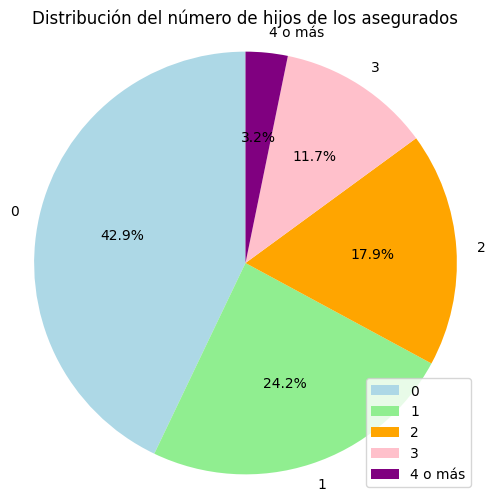

In [16]:
# Crear el gráfico de tarta
# figsize=(12, 10): 12 pulgadas de ancho, 10 pulgadas de alto

plt.figure(figsize=(6, 6))

plt.pie(children_counts, labels=children_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'orange', 'pink', 'purple'])
plt.title('Distribución del número de hijos de los asegurados')
plt.axis('equal')  # Asegura que el gráfico de tarta se vea como un círculo
plt.legend()
plt.show()

E006. Crea una figura con cuatro subplots como el del ejercicio anterior, uno por cada región. (ChatGPTeando)

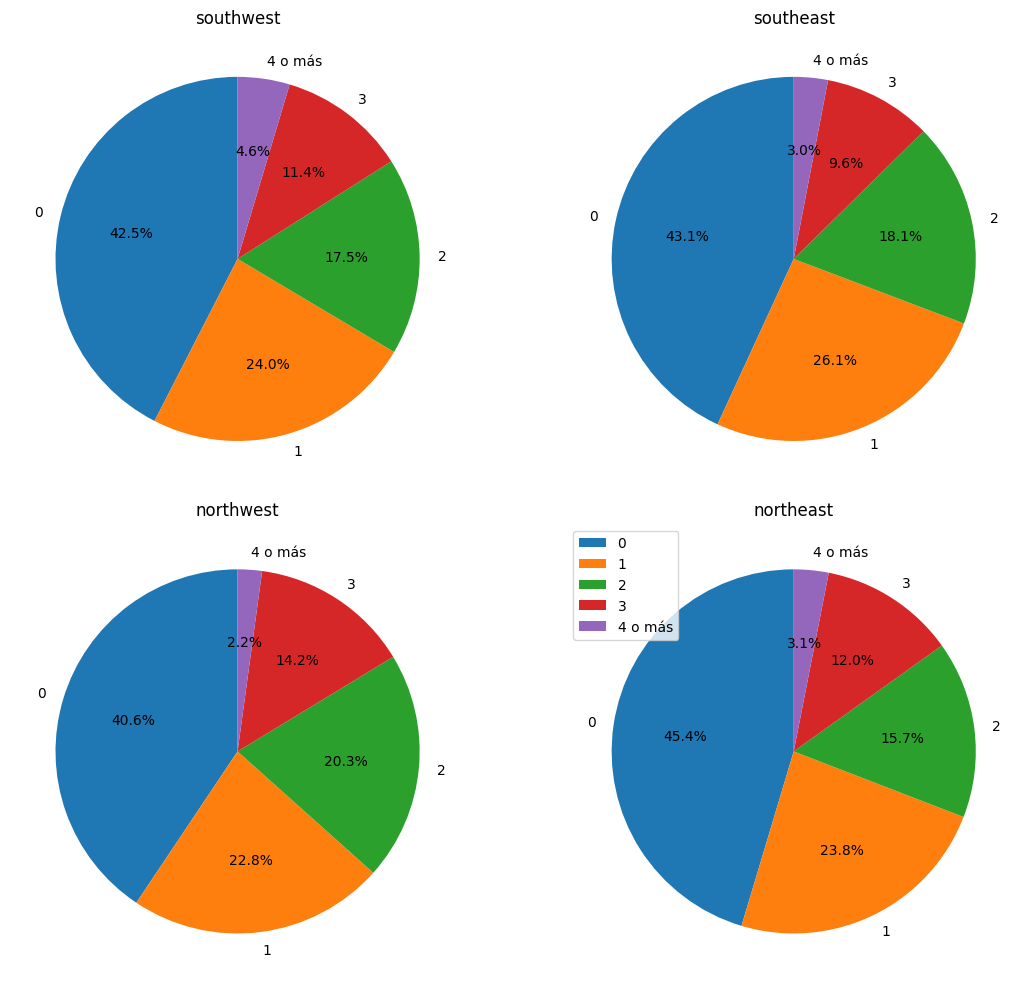

In [18]:
# Crear una nueva columna categórica para agrupar los hijos en 5 categorías (0, 1, 2, 3, y "4 o más")
datos['children_cat'] = datos['children'].apply(lambda x: '4 o más' if x >= 4 else str(x))

# Crear una figura con 4 subplots (2 filas x 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Agrupar los datos por región
grupo_por_region = datos.groupby('region')

# Lista de las regiones únicas
regiones = datos['region'].unique()

# Iterar sobre cada región y su correspondiente subplot
for i, region in enumerate(regiones):
    # Filtrar los datos por cada región
    datos_region = grupo_por_region.get_group(region)
    # Contar el número de asegurados por categoría de hijos en la región
    hijos_region = datos_region['children_cat'].value_counts()
    # Seleccionar el subplot adecuado
    ax = axs[i // 2, i % 2]
    # Crear el gráfico de tarta
    ax.pie(hijos_region, labels=hijos_region.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{region}')

# Ajustar el espaciado entre subplots
plt.tight_layout()
plt.legend()
plt.show()